# Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# Archivo de datos

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/gym_churn_us.csv')

In [ ]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Análisis exploratorio de datos

In [ ]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


# Histogramas de barras y distribuciones de características

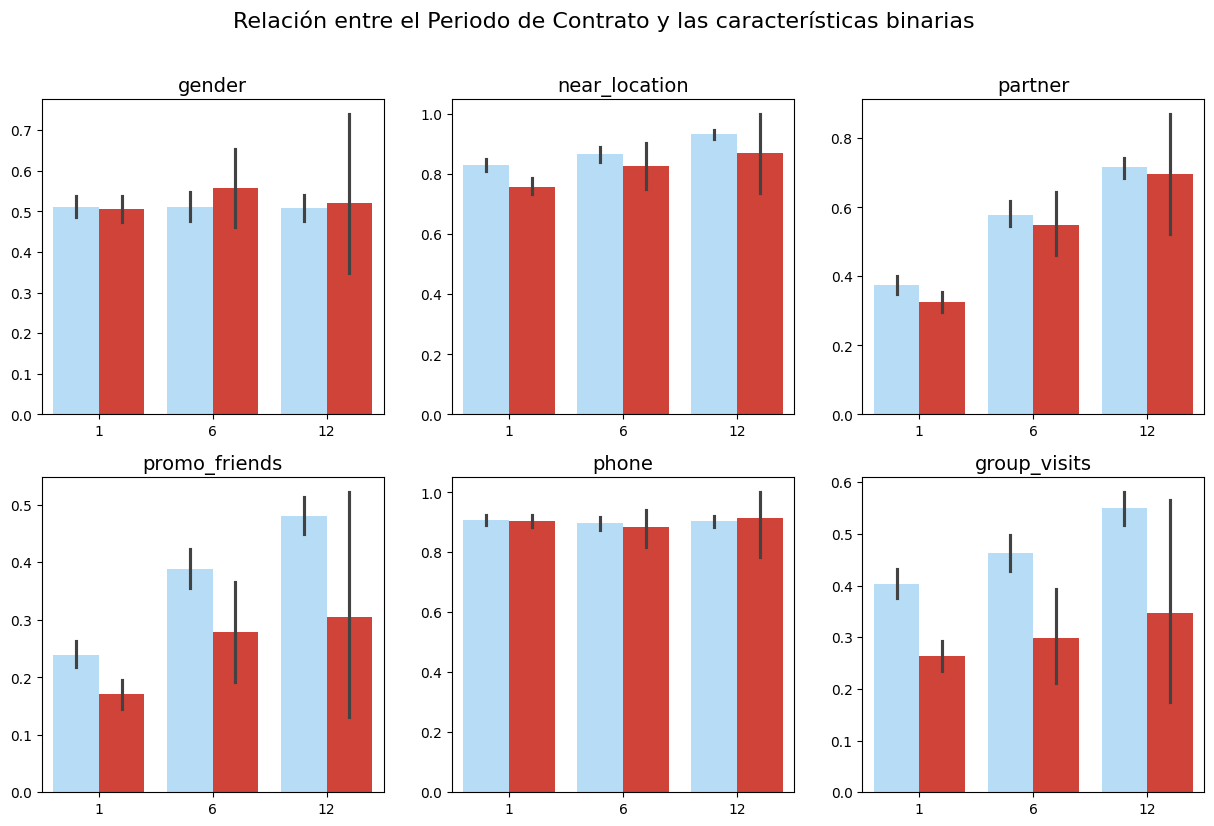

In [ ]:
columns = ['gender', 'near_location','partner', 'promo_friends', 'phone', 'group_visits']
cols = '#addeff', '#e82d1f'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,9))
for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.barplot(x='contract_period', y=columns[i], data=data, hue='churn', palette=cols, ax=ax)
        ax. legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{columns[i]}', fontsize=14)
    else:
        ax.axis('off')

fig.suptitle('Relación entre el Periodo de Contrato y las características binarias', fontsize=16)
fig.subplots_adjust(top=0.88)
plt.show( )

En el gráfico anterior tenemos en azul las personas que se quedaron y en rojo las que se fueron, en cuanto a las variables binarias y su relación con el periodo de tiempo en meses que contrataron. En su mayoría, todas las variables son similares excepto por promo friends y group visits, en las cuales, predominan las personas que se quedaron.

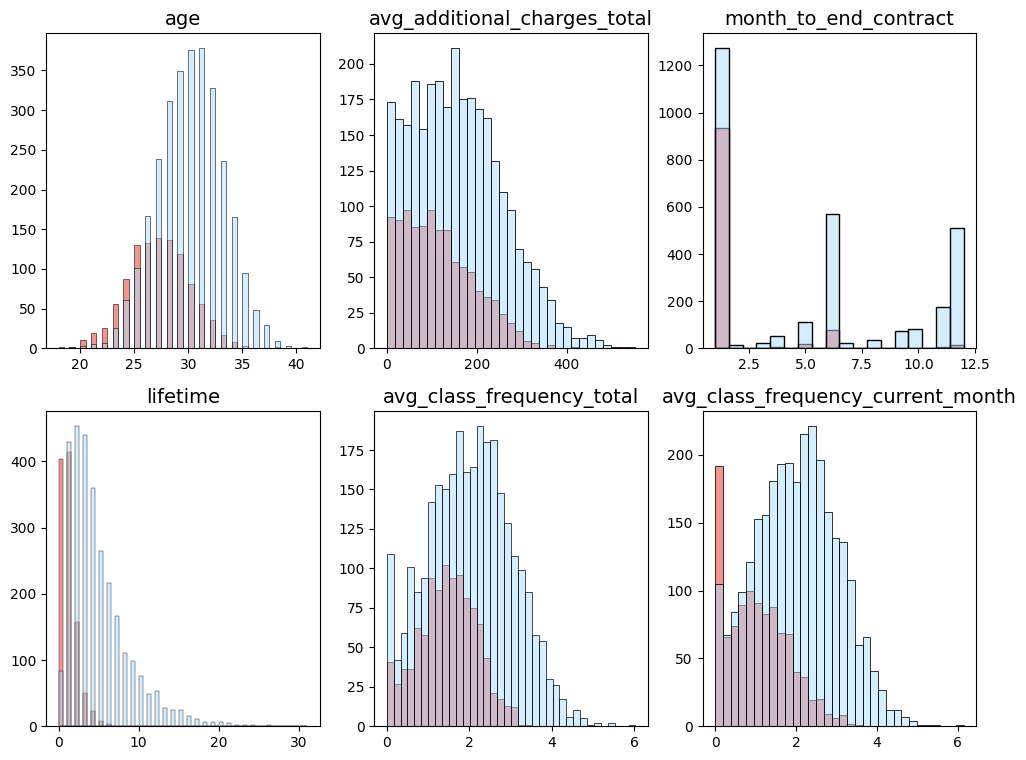

In [ ]:
columns = ['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime','avg_class_frequency_total',
'avg_class_frequency_current_month' ]
colors = '#addeff', '#e82d1f'

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.histplot(x=columns[i], data=data, hue='churn', palette=colors, ax=ax)
        ax.legend([], [], frameon=False)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(f'{columns[i]}', fontsize=14)
    else:
        ax.axis('off')

fig.subplots_adjust(top=0.88)
plt.show()

En el gráfico anterior, podemos observar las variables continuas, las cuales tienen distribuciones similares para cada grupo, excepto en las variables de edad, lifetime y Avg_class_frequency_current_month.

# Mátriz de correlación

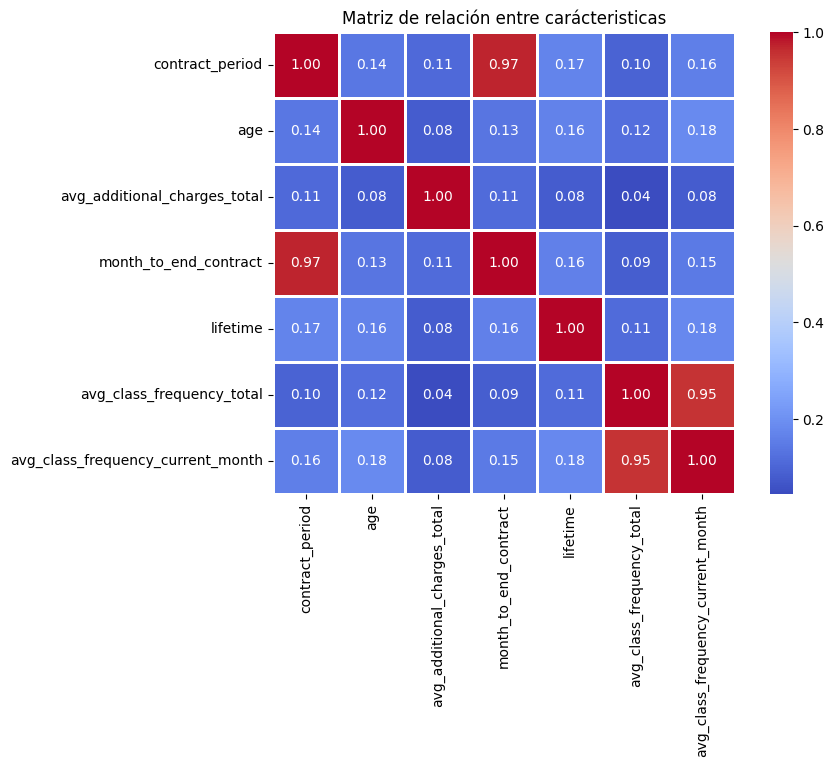

In [ ]:
quant_cols = ['contract_period', 'age', 'avg_additional_charges_total',
'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
'avg_class_frequency_current_month']

gym_churn_quant = data[quant_cols]

cm = gym_churn_quant.corr()

plt.figure(figsize = (9,6))
plt.title('Matriz de relación entre carácteristicas')
sns.heatmap(cm, fmt= '.2f', annot = True, square = True, linewidths=1, linecolor='white', cmap="coolwarm")
plt.show(block=False)

En esta matriz se puede observar que hay una alta correlación entre las características 'month_to_end_contract' y 'contract_period' y también 'avg_class_frequency_current_month' y 'avg_class_frequency_total', por lo que podríamos deshacernos de una de ellas para introducir al modelo ya que no será de gran utilidad.

# Modelo para predecir la cancelación de usuarios

In [ ]:
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [ ]:
#X = data.drop(['churn', 'gender', 'phone', 'avg_class_frequency_current_month', 'contract_period'], axis=1)
X = data.drop('churn', axis=1)
y = data['churn']

In [ ]:
X

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237


In [ ]:
y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3995,0
3996,1
3997,0
3998,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


## Regresión logística

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_lr = LogisticRegression(random_state=12345)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=12345)

In [ ]:
pred_lr = model_lr.predict(X_test)
proba_lr = model_lr.predict_proba(X_test)[:,1]

#Exactitud, precisión y recall
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, pred_lr)))
print('Precisión: {:.2f}'.format(precision_score(y_test, pred_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, pred_lr)))

Exactitud: 0.92
Precisión: 0.87
Recall: 0.81


## Bosque aleatorio

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 50, max_depth=10, random_state = 12345)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=12345)

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:,1]

# Exactitud, precisión y recall
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, rf_pred)))
print('Precisión: {:.2f}'.format(precision_score(y_test, rf_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_pred)))

Exactitud: 0.90
Precisión: 0.85
Recall: 0.75


Según el cálculo realizado previamente, el modelo que mejores resultados dio en cuanto a Exactitud, precisión y Recall es el de regresión logística.

# **Clústeres de usuarios/as**

## Estandariza los datos

In [ ]:
scaler = StandardScaler()
X_cluster = scaler.fit_transform(data.drop('churn', axis=1))

## Matriz de distancias

In [ ]:
distance_matrix = pdist(X_cluster)

linkage_matrix = linkage(distance_matrix, method='ward')

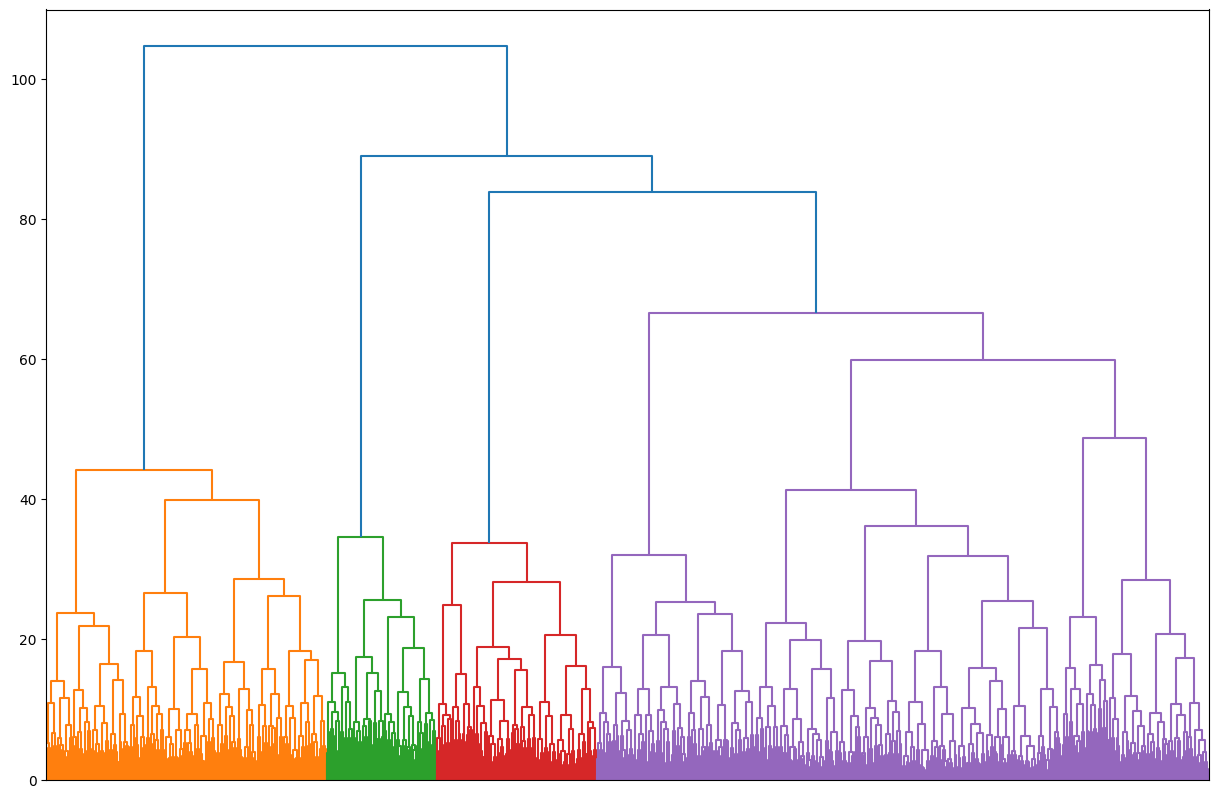

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, orientation = 'top', no_labels=True)

plt.show()

## Clustering K-Means

In [ ]:
km = KMeans(n_clusters=5, random_state=12345)
km.fit(X_cluster)

KMeans(n_clusters=5, random_state=12345)

In [ ]:
labels = km.fit_predict(X_cluster)

In [ ]:
data['cluster_km'] = labels
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,4


## Valores medios de característica para los clústeres

In [ ]:
data.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.482007,1.000000,0.000000,0.000000,0.904035,1.854962,0.351145,28.343511,134.179633,1.781897,2.462377,1.401050,1.183070,0.509269
1,0.579843,0.972513,0.356021,0.242147,0.901832,2.998691,0.473822,30.399215,161.227780,2.750000,5.311518,2.996617,3.006425,0.032723
2,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327,0.448718
3,0.505735,0.945777,0.744526,0.509906,0.904067,11.743483,0.557873,29.947862,166.329257,10.751825,4.798749,1.998245,1.991038,0.020855
4,0.492629,1.000000,0.868550,0.636364,0.895577,2.771499,0.384521,28.565111,133.675082,2.584767,3.008600,1.375230,1.197501,0.373464


## Distribuciones de características

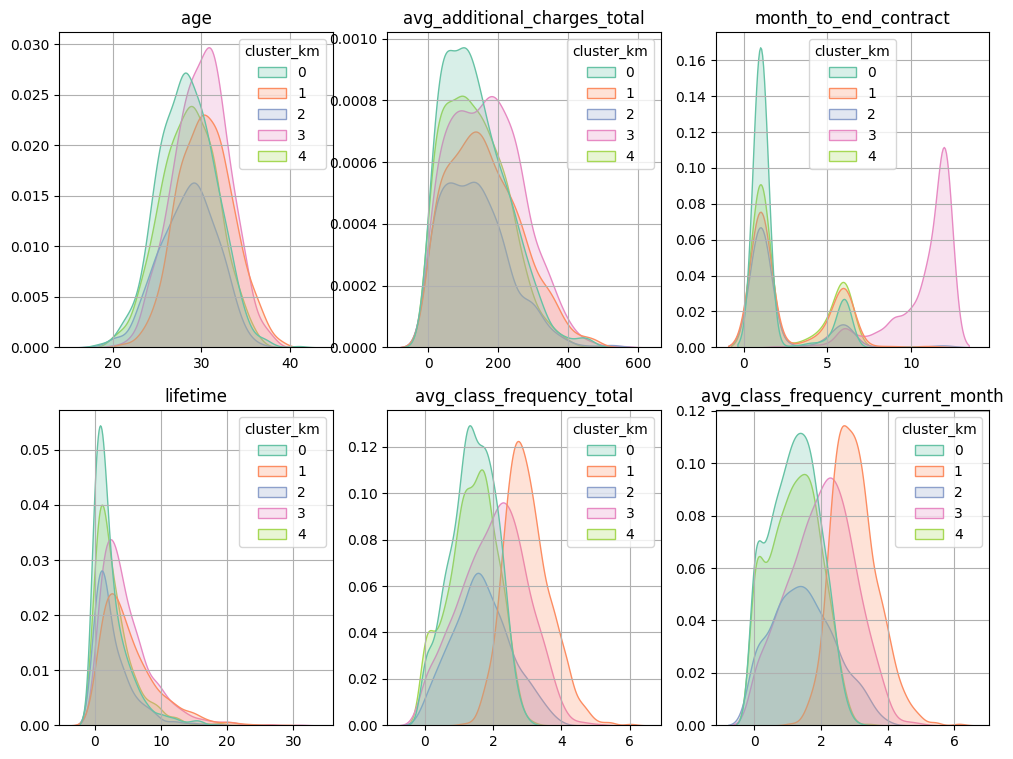

In [ ]:
columns = ['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime','avg_class_frequency_total',
'avg_class_frequency_current_month' ]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.kdeplot(data=data, x=columns[i], hue='cluster_km', fill=True, palette='Set2', ax=ax)
        ax.set_title(columns[i])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True)
    else:
        ax.axis('off')

fig.subplots_adjust(top=0.88)
plt.show()

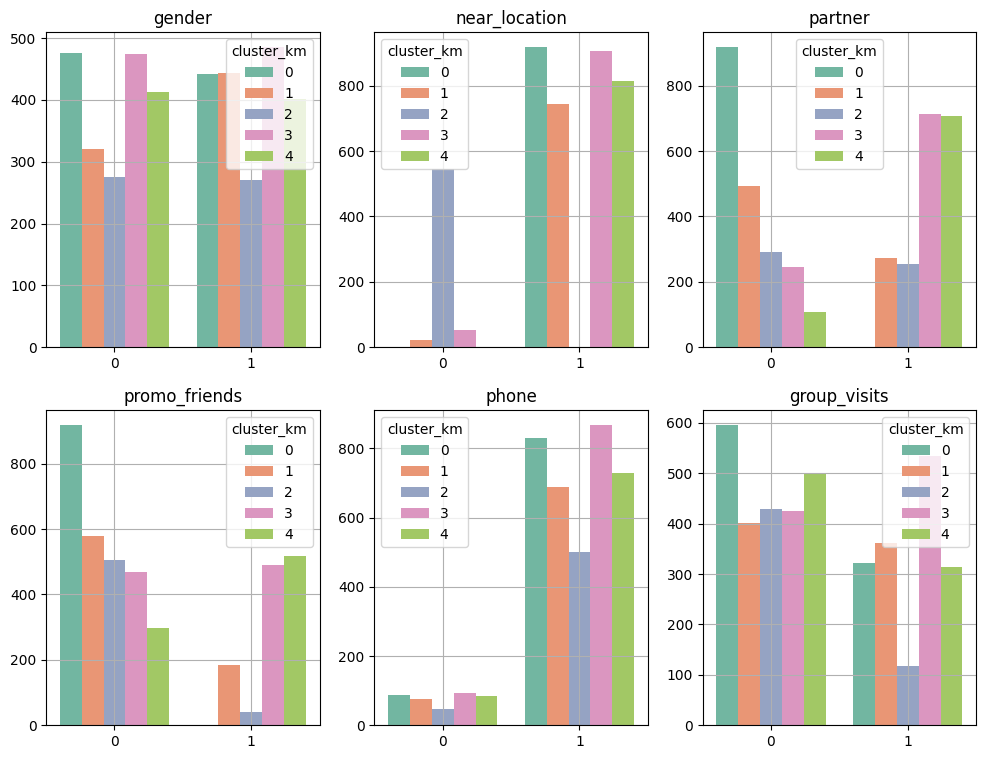

In [ ]:
columns = ['gender', 'near_location','partner', 'promo_friends', 'phone', 'group_visits']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 9))

for i, ax in enumerate(axs.flat):
    if i < len(columns):
        sns.countplot(data=data, x=columns[i], hue='cluster_km', fill=True, palette='Set2', ax=ax)
        ax.set_title(columns[i])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True)
    else:
        ax.axis('off')

fig.subplots_adjust(top=0.88)
plt.show()

## Tasa de cancelación para cada clúster

In [ ]:
data.groupby('cluster_km')['churn'].mean()

,churn
cluster_km,
0,0.509269
1,0.032723
2,0.448718
3,0.020855
4,0.373464


*   Cluster 0: Tiene una alta tasa de cancelación (50%), duración de contratos cortos, no usaron promociones de amigos o compañía.
*   Cluster 1: Muy poca cancelación (3%), duración de contrato aproximadamente 3 meses y tiene la mayor frecuencia media de visitas por semana.
*   Cluster 2: Tasa de cancelación un poco alta, poca frecuencia de visitas, contratos cortos.
*   **Cluster 3: Tienen la tasa de cancelación más baja (2%), los contratos más largos, alta participación en visitas grupales (0.55) y frecuencia media-alta en clases. Buena participación de amigos y compañías.**
*   Cluster 4: Gran presencia de promociones por parte de amigos y descuentos de compañías, pero tiene una tasa de cancelación media (37%) y frecuencia de visitas muy baja.





# Conclusiones y recomendaciones

Tenemos varios tipos de clientes:

1.   Clientes comprometidos (clúster 3)
2.   Clientes activos pero no leales (clúster 1)
3.   Clientes en riesgo (clústeres 0, 2, 4)

**ESTRATEGIAS**

 **Activar campañas de recuperación**
*   Detectar patrones de abandono temprano (por ejemplo, visitas en caída, contratos próximos a vencimiento).
*   Descuentos especiales a clientes antiguos: “renueva ahora y recibe 1 mes gratis o “invita a un amigo sin costo”.
*   Llamadas personalizadas o mensajes desde el staff para conocer motivos deL abandono.

**Recompensar la constancia y la lealtad**
*   Descuentos progresivos al renovar contratos largos (por ejemplo, 10% al renovar anualidad).
*   Programa de fidelización: puntos por visitas, clases grupales o gastos adicionales canjeables por productos o servicios
*   Reconocimientos mensuales: "Cliente del mes" entre los más activos, con beneficios o descuentos.

**Fomentar el compromiso temprano**
*   Enviar correos automáticos de recordatorios de beneficios y consejos para aprovechar al máximo la membresía.
*   Bonificaciones por asistir a 3 clases grupales en el primer mes.